In [9]:
import math
import numpy as np
import random as rd
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
crow_data = pd.read_csv("crow-data.csv")
crow_data['ship'] = ["Kestrel A", "Kestrel B", "Kestrel C", "Engi A", "Engi B", "Engi C", "Federation A", "Federation B", "Federation C", "Zoltan A", "Zoltan B", "Zoltan C", "Stealth A", "Stealth B", "Stealth C", "Rock A", "Rock B", "Rock C", "Slug A", "Slug B", "Slug C", "Mantis A", "Mantis B", "Mantis C", "Crystal A", "Crystal B", "Lanius A", "Lanius B"]
crow_data = crow_data[['ship', 'wins', 'losses']]
crow_data['ratio'] = crow_data['wins'] / (crow_data['wins'] + crow_data['losses'])

In [45]:
farb_data = pd.read_csv("farb-data.csv")
farb_data['ship'] = ["Kestrel A", "Kestrel B", "Kestrel C", "Engi A", "Engi B", "Engi C", "Federation A", "Federation B", "Federation C", "Zoltan A", "Zoltan B", "Zoltan C", "Stealth A", "Stealth B", "Stealth C", "Rock A", "Rock B", "Rock C", "Slug A", "Slug B", "Slug C", "Mantis A", "Mantis B", "Mantis C", "Crystal A", "Crystal B", "Lanius A", "Lanius B"]
farb_data = farb_data[['ship', 'wins', 'losses']]
farb_data['ratio'] = farb_data['wins'] / (farb_data['wins'] + farb_data['losses'])

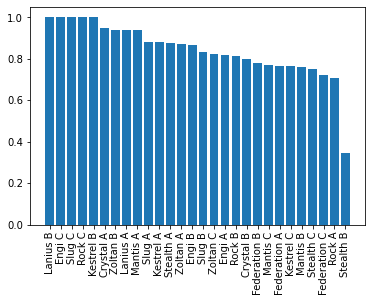

In [11]:
temp = crow_data.sort_values('ratio', ascending=False)
plt.bar(temp.ship, temp.ratio);
plt.xticks(rotation = 90);

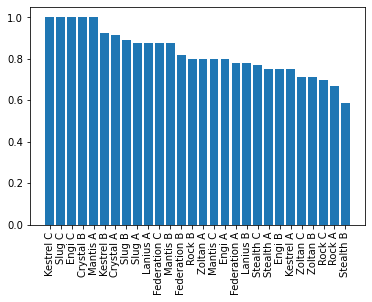

In [73]:
temp = farb_data.sort_values('ratio', ascending=False)
plt.bar(temp.ship, temp.ratio);
plt.xticks(rotation = 90);
plt.savefig('farbships.png')

In [12]:
def simulate_streak(odds):
    # Start at streak 0, no ships done
    result = 1
    streak = 0
    ships_done = []
    
    # While on a streak
    while result:
        
        # If looping after 28 ships
        if len(ships_done) == 28:
            ships_done = []
            
        # Roll random ship
        rnd_ship = rd.randint(0, 27)
        
        # If ship not done yet
        if rnd_ship not in ships_done:
            
            # Get probability of winning for ship
            win_prob = odds[rnd_ship]
            lose_prob = 1-win_prob
            
            # Roll win or loss
            result *= np.random.choice(a = [0, 1], p = [lose_prob, win_prob])
            
            # If win, increment streak, mark ship as done
            if result:
                streak += 1
                ships_done.append(rnd_ship)                
    
    # Print results
    #print("Streak length: " + str(streak))
    #print("Streak ended on ship: " + str(rnd_ship))
    
    return(streak, rnd_ship)

In [13]:
def run_streaks(odds, num):
    streak_lengths = []
    i = 0
    while i < num:
        streak_lengths.append(simulate_streak(odds)[0])
        i += 1
    
    return streak_lengths

In [15]:
crow_streaks = run_streaks(crow_data.ratio, 1000000)

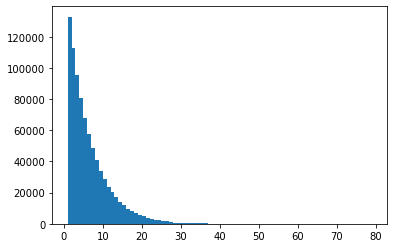

In [44]:
counts = plt.hist(crow_streaks, bins = range(1,80))
plt.savefig('png')

In [47]:
farb_streaks = run_streaks(farb_data.ratio, 1000000)

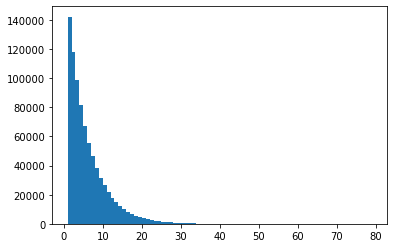

In [49]:
counts = plt.hist(farb_streaks, bins = range(1,80))
plt.savefig('farb.png')

In [57]:
np.where(farb_streaks == 10)
np.where(np.array(farb_streaks) == 80)

(array([400583]),)

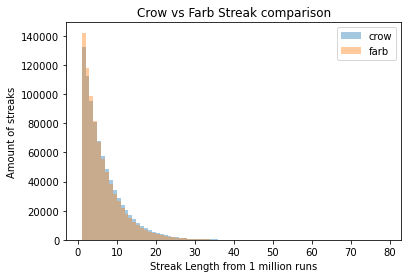

In [67]:
plt.hist(crow_streaks, alpha= 0.4, label = 'crow', bins = range(1,80))
plt.hist(farb_streaks, alpha= 0.4, label = 'farb', bins = range(1,80))
plt.legend(loc='upper right')
plt.xlabel('Streak Length from 1 million runs')
plt.ylabel('Amount of streaks')
plt.title('Crow vs Farb Streak comparison')
plt.savefig('crowvsfarb.png')

In [74]:
np_farb = np.array(farb_streaks)
len(np_farb[np_farb > 17])/1000000

0.030743